In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.metrics import accuracy_score, f1_score

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
data=pd.read_csv("audit_data.csv")
trial=pd.read_csv("trial.csv")

In [26]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [28]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


# Data Preprocessing 1

In [31]:
data.shape

(776, 27)

In [33]:
trial.shape

(776, 18)

In [35]:
trial.duplicated().sum()

13

In [37]:
data.duplicated().sum()

13

# Removing Duplicates

In [39]:
data = data.drop_duplicates()
trial = trial.drop_duplicates()

In [42]:
(data.isnull().sum()/len(data)*100)

Sector_score      0.000000
LOCATION_ID       0.000000
PARA_A            0.000000
Score_A           0.000000
Risk_A            0.000000
PARA_B            0.000000
Score_B           0.000000
Risk_B            0.000000
TOTAL             0.000000
numbers           0.000000
Score_B.1         0.000000
Risk_C            0.000000
Money_Value       0.131062
Score_MV          0.000000
Risk_D            0.000000
District_Loss     0.000000
PROB              0.000000
RiSk_E            0.000000
History           0.000000
Prob              0.000000
Risk_F            0.000000
Score             0.000000
Inherent_Risk     0.000000
CONTROL_RISK      0.000000
Detection_Risk    0.000000
Audit_Risk        0.000000
Risk              0.000000
dtype: float64

In [44]:
(trial.isnull().sum()/len(data)*100)

Sector_score     0.000000
LOCATION_ID      0.000000
PARA_A           0.000000
SCORE_A          0.000000
PARA_B           0.000000
SCORE_B          0.000000
TOTAL            0.000000
numbers          0.000000
Marks            0.000000
Money_Value      0.131062
MONEY_Marks      0.000000
District         0.000000
Loss             0.000000
LOSS_SCORE       0.000000
History          0.000000
History_score    0.000000
Score            0.000000
Risk             0.000000
dtype: float64

# Removing Nulls

In [47]:
data['Money_Value'] = data['Money_Value'].fillna(data['Money_Value'].mean())
trial['Money_Value'] = trial['Money_Value'].fillna(trial['Money_Value'].mean())

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    763 non-null    float64
 1   LOCATION_ID     763 non-null    object 
 2   PARA_A          763 non-null    float64
 3   Score_A         763 non-null    float64
 4   Risk_A          763 non-null    float64
 5   PARA_B          763 non-null    float64
 6   Score_B         763 non-null    float64
 7   Risk_B          763 non-null    float64
 8   TOTAL           763 non-null    float64
 9   numbers         763 non-null    float64
 10  Score_B.1       763 non-null    float64
 11  Risk_C          763 non-null    float64
 12  Money_Value     763 non-null    float64
 13  Score_MV        763 non-null    float64
 14  Risk_D          763 non-null    float64
 15  District_Loss   763 non-null    int64  
 16  PROB            763 non-null    float64
 17  RiSk_E          763 non-null    float64


In [51]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   763 non-null    float64
 1   LOCATION_ID    763 non-null    object 
 2   PARA_A         763 non-null    float64
 3   SCORE_A        763 non-null    int64  
 4   PARA_B         763 non-null    float64
 5   SCORE_B        763 non-null    int64  
 6   TOTAL          763 non-null    float64
 7   numbers        763 non-null    float64
 8   Marks          763 non-null    int64  
 9   Money_Value    763 non-null    float64
 10  MONEY_Marks    763 non-null    int64  
 11  District       763 non-null    int64  
 12  Loss           763 non-null    int64  
 13  LOSS_SCORE     763 non-null    int64  
 14  History        763 non-null    int64  
 15  History_score  763 non-null    int64  
 16  Score          763 non-null    float64
 17  Risk           763 non-null    int64  
dtypes: float64(7), 

# Checking Outliers in Data

In [54]:
pd.set_option('display.max_columns', None)
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.0,763.000000,763.000000
mean,19.721311,2.491298,0.353866,1.373919,10.983474,0.315072,6.441822,13.442532,5.068807,0.224115,1.155570,14.378824,0.292529,8.406261,2.508519,0.206291,0.520052,0.106160,0.217038,0.054522,2.714024,17.956720,0.574574,0.5,7.284109,0.398427
std,24.132399,5.718259,0.174398,3.465152,50.489113,0.170597,30.316831,51.719679,0.266546,0.080974,0.541607,67.103095,0.160656,40.295660,1.230994,0.037818,0.291352,0.535365,0.068529,0.308352,0.861574,55.163921,0.447253,0.0,38.985618,0.489895
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.260000,0.200000,0.052000,0.000000,0.200000,0.000000,0.590000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.593000,0.400000,0.5,0.318600,0.000000
50%,3.890000,0.900000,0.200000,0.180000,0.440000,0.200000,0.088000,1.420000,5.000000,0.200000,1.000000,0.110000,0.200000,0.022000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.238000,0.400000,0.5,0.590000,0.000000
75%,55.570000,2.515000,0.600000,1.509000,4.365000,0.400000,2.104000,7.990000,5.000000,0.200000,1.000000,6.040000,0.400000,2.364000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.400000,10.960000,0.400000,0.5,3.452800,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


# Outlier Removal in Data

In [56]:
columns = ['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss']

Q3 = data[columns].quantile(.75)
Q1 = data[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

for column in columns:
    data[column] = np.where(data[column] > UL[column], UL[column], np.where(data[column] < LL[column], LL[column], data[column]))

In [59]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,19.721311,2.491298,3.538663,10.983474,3.150721,13.442532,5.068807,2.241153,14.378824,2.925295,2.508519,0.030144,2.062910,0.106160,2.170380,2.714024,0.635649
std,24.132399,5.718259,1.743985,50.489113,1.705967,51.719679,0.266546,0.809740,67.103095,1.606557,1.230994,0.185804,0.378178,0.535365,0.685288,0.861574,0.481563
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.260000,2.000000,0.000000,2.000000,0.590000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.440000,2.000000,1.420000,5.000000,2.000000,0.110000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.515000,6.000000,4.365000,4.000000,7.990000,5.000000,2.000000,6.040000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.400000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


# Checking Outliers in Trial

In [64]:
columns = ['Sector_score', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'numbers', 'Marks', 'Money_Value']

Q3 = trial[columns].quantile(.75)
Q1 = trial[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

for column in columns:
    trial[column] = np.where(trial[column] > UL[column], UL[column], np.where(trial[column] < LL[column], LL[column], trial[column]))

In [66]:
data.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss     float64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['LOCATION_ID'] = encoder.fit_transform(data['LOCATION_ID'])
trial['LOCATION_ID'] = encoder.fit_transform(trial['LOCATION_ID'])

# Multicollinearity Check

<Axes: >

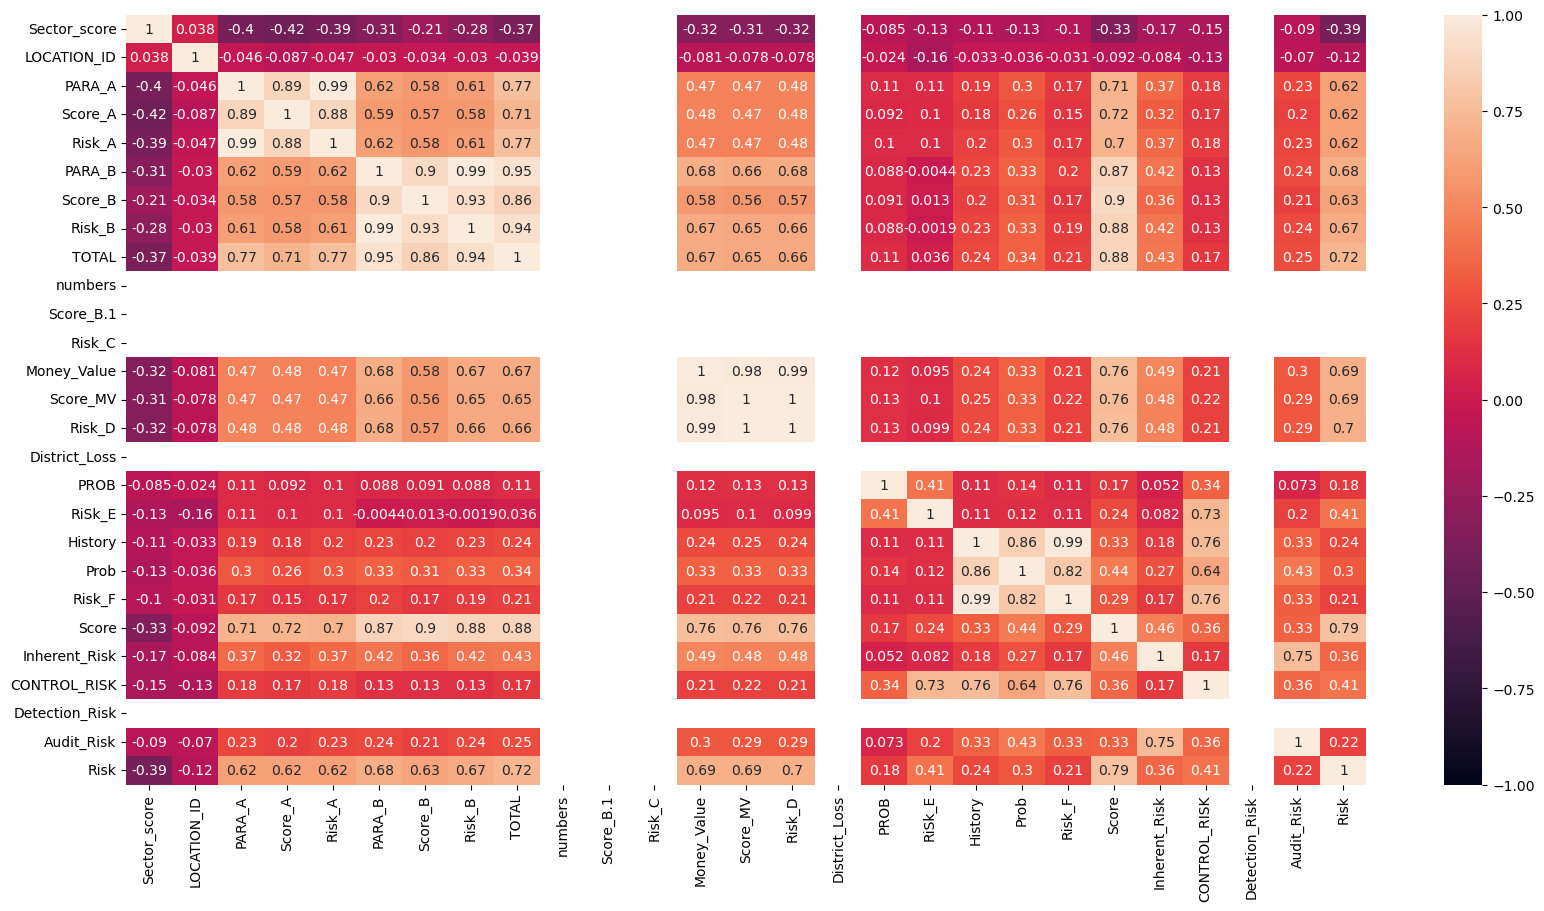

In [70]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['features'] = data.columns

vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

,features,VIF
0,Sector_score,1.363793
1,LOCATION_ID,1.048025
2,PARA_A,96.803705
3,Score_A,6.874512
4,Risk_A,90.221067
5,PARA_B,111.558902
6,Score_B,25.067233
7,Risk_B,124.818126
8,TOTAL,26.244464
9,numbers,0.000000


# Horizontal Bar Plot

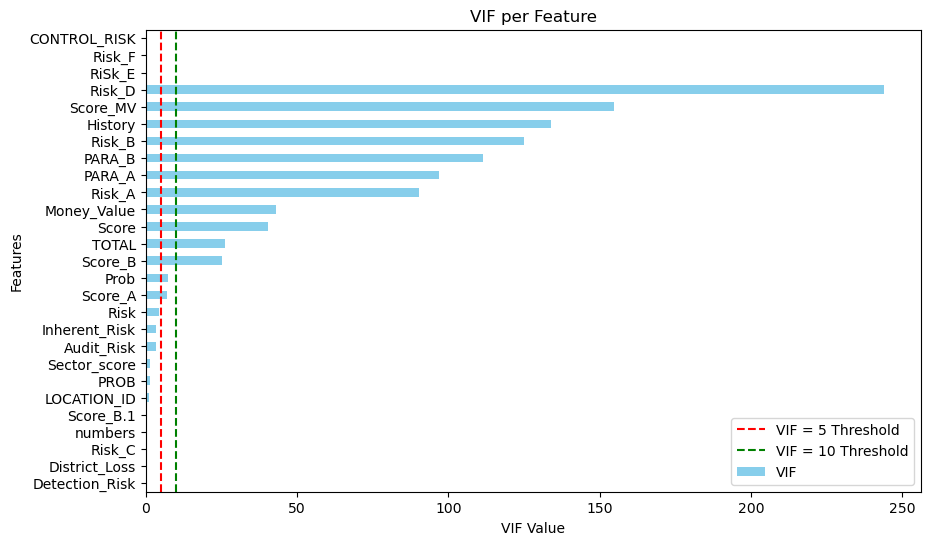

In [158]:
vif_data.sort_values("VIF", ascending=True).plot(
    x="features", y="VIF", kind="barh", figsize=(10,6), legend=False, color="skyblue"
)
plt.axvline(x=5, color='r', linestyle='--', label='VIF = 5 Threshold')
plt.axvline(x=10, color='g', linestyle='--', label='VIF = 10 Threshold')
plt.xlabel("VIF Value")
plt.ylabel("Features")
plt.title("VIF per Feature")
plt.legend()
plt.show()


# Heatmap (correlation + VIF insight)

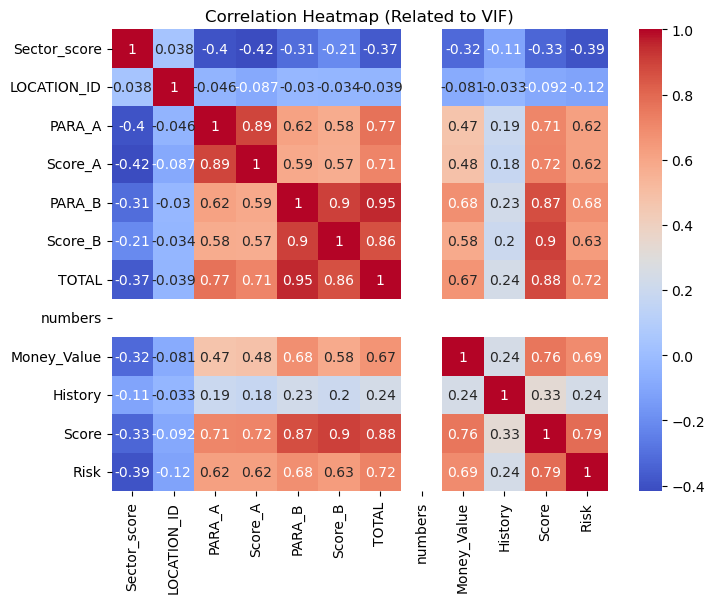

In [156]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Related to VIF)")
plt.show()


In [75]:
trial.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

In [77]:
data.drop(['Score_MV', 'Inherent_Risk', 'Risk_A', 'Risk_B', 'Risk_D', 'Prob', 'Risk_F', 'CONTROL_RISK'], axis = 1,  inplace=True)

In [79]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'District_Loss', 'PROB', 'RiSk_E', 'History', 'Score', 'Detection_Risk',
       'Audit_Risk', 'Risk'],
      dtype='object')

# Data Processing  2

In [82]:
data.shape

(763, 19)

In [84]:
trial.shape

(763, 18)

In [86]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'District_Loss', 'PROB', 'RiSk_E', 'History', 'Score', 'Detection_Risk',
       'Audit_Risk', 'Risk'],
      dtype='object')

In [88]:
trial.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

In [90]:
data.drop(['Score_B.1', 'Risk_C', 'District_Loss', 'PROB', 'RiSk_E', 'Detection_Risk', 'Audit_Risk'], axis = 1, inplace = True)

In [92]:
trial.drop(['Marks', 'LOSS_SCORE', 'History_score'], axis = 1, inplace = True)

In [94]:
trial.drop(['MONEY_Marks', 'District', 'Loss'], axis = 1, inplace= True)

In [96]:
data.shape

(763, 12)

In [98]:
trial.shape

(763, 12)

In [100]:
train_x = data.drop(['Risk'], axis = 1)
train_y = data['Risk']

In [102]:
test_x = trial.drop(['Risk'], axis = 1)
test_y = trial['Risk']

In [104]:
train_x.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Money_Value', 'History', 'Score'],
      dtype='object')

In [106]:
test_x.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Money_Value', 'History', 'Score'],
      dtype='object')

In [108]:
train_x.dtypes

Sector_score    float64
LOCATION_ID       int32
PARA_A          float64
Score_A         float64
PARA_B          float64
Score_B         float64
TOTAL           float64
numbers         float64
Money_Value     float64
History           int64
Score           float64
dtype: object

In [110]:
test_x.dtypes

Sector_score    float64
LOCATION_ID       int32
PARA_A          float64
SCORE_A         float64
PARA_B          float64
SCORE_B         float64
TOTAL           float64
numbers         float64
Money_Value     float64
History           int64
Score           float64
dtype: object

# Machine Learning Algorithms

## Logistic Regression

In [125]:
lr = LogisticRegression()

# Convert feature names in the test dataset to match the case of training data (Error received earlier)
test_x.rename(columns = {'SCORE_A': 'Score_A', 'SCORE_B': 'Score_B'}, inplace = True)

lr_model = lr.fit(train_x, train_y)
y_predlr = lr_model.predict(test_x)

In [127]:
accuracy_lr = accuracy_score(test_y, y_predlr)
f1_lr = f1_score(test_y, y_predlr)
print('Accuracy With Logistic Regression = ', accuracy_lr)
print('F1 Score With Logistic Regression = ', f1_lr)

Accuracy With Logistic Regression =  0.39580602883355176
F1 Score With Logistic Regression =  0.09430255402750491


## Decision Tree Classifier

In [129]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(train_x, train_y)
y_preddt = dt_model.predict(test_x)

In [132]:
accuracy_dt = accuracy_score(test_y, y_preddt)
f1_dt = f1_score(test_y, y_preddt)
print('Accuracy With Decision Tree Classifier = ', accuracy_dt)
print('F1 Score With Decision Tree Classifier = ', f1_dt)

Accuracy With Decision Tree Classifier =  0.7588466579292268
F1 Score With Decision Tree Classifier =  0.7659033078880407


## Random Forest

In [134]:
rf = RandomForestClassifier()

rf_model = rf.fit(train_x, train_y)
y_predrf = rf_model.predict(test_x)

In [136]:
accuracy_rf = accuracy_score(test_y, y_predrf)
f1_rf = f1_score(test_y, y_predrf)
print('Accuracy With Random Forest Classifier = ', accuracy_rf)
print('F1 Score With Random Forest Classifier = ', f1_rf)

Accuracy With Random Forest Classifier =  0.7536041939711664
F1 Score With Random Forest Classifier =  0.7595907928388747


# Scaling our Data

In [138]:
sc = StandardScaler()

# Employing Logistic Regression
train_x2 = sc.fit_transform(train_x)
test_x2 = sc.transform(test_x)
dt_model2 = dt.fit(train_x2, train_y)
y_pred2 = dt_model2.predict(test_x2)

# Evaluating Scaled Model
accuracy = accuracy_score(test_y, y_pred2)
f1 = f1_score(test_y, y_pred2)
print('Scaled Accuracy With Decision Tree Classifier = ', accuracy)
print('Scaled F1 Score With Decision Tree Classifier = ', f1)

Scaled Accuracy With Decision Tree Classifier =  0.7509829619921363
Scaled F1 Score With Decision Tree Classifier =  0.7564102564102564


### Confusion Matrix

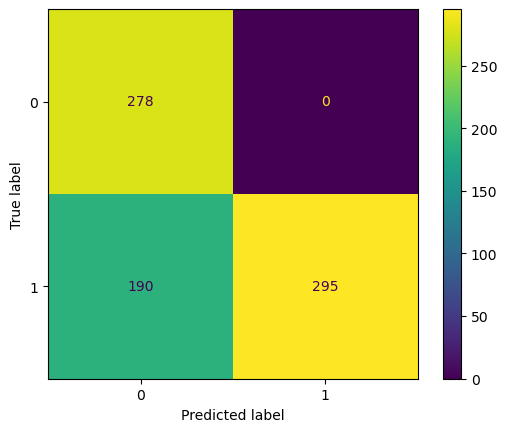

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_model2, test_x2, test_y)
plt.show()


### Classification Report as a Heatmap

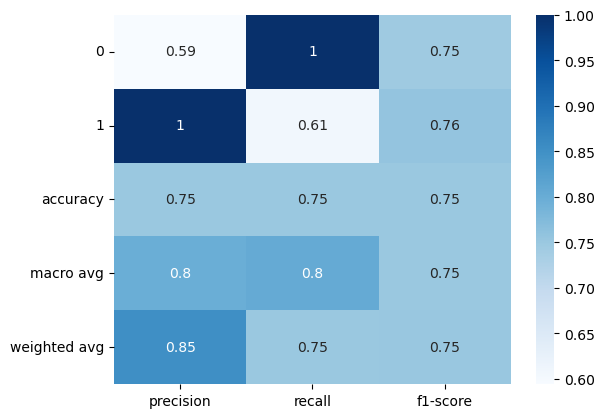

In [148]:
from sklearn.metrics import classification_report
import seaborn as sns

report = classification_report(test_y, y_pred2, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.show()


# Prediction View

## Random Forest

In [142]:
pred_data = pd.DataFrame(np.column_stack((y_pred2, test_y)), columns = ['Prediction', 'Test'])
pred_data

,Prediction,Test
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
758,0,0
759,0,0
760,0,0
761,0,0
